# Cryogenic Pump Data Analysis

In [86]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = 15,3
blue = '#1f77b4'

## Initializing the data
Round the nanoseconds to the nearest second.

In [50]:
url = "pump_data.csv"
dtype = {
    "unitsequence": int,
    "uppervalue": float,
    "lowervalue": float,
    "rotorspeed": float,
    "motortemp": float,
    "controllertemp": float,
    "dcvoltage": float,
    "motorcurrent": float,
    "rotorposition0": str,
    "rotorposition1": str,
    "rotorposition2": str,
    "rotorposition3": str,
    "rotorposition4": str,
    "magcurrent0": float,
    "magcurrent1": float,
    "magcurrent2": float,
    "magcurrent3": float,
    "magcurrent4": float,
    "magcurrent5": float,
    "magcurrent6": float,
    "magcurrent7": float,
    "magcurrent8": float,
    "magcurrent9": float,
    "sumcurrents": float,
    "tmsactualtemp": float,
    "yh": str,
    "yb": str,
    "z": float,
    "motorspeed": str,
    "temp1": str,
    "temp2": str,
    "heater1": str,
    "heater2": str,
    "tcpressure": str,
    "timestamp": str,
    "currentregen": str,
    "alarmstatusbits": str,
    "alertstatusbits": str,
    "valvestate": str
}
parse_dates = ['timestamp']
x = pd.read_csv(url, dtype=dtype, parse_dates=parse_dates)
x.loc[:,'timestamp'] = x.loc[:,'timestamp'].astype('datetime64[s]')
print("Shape:", x.shape)

Shape: (1218368, 39)


In [76]:
x.head()

,unitsequence,uppervalue,lowervalue,rotorspeed,motortemp,controllertemp,dcvoltage,motorcurrent,rotorposition0,rotorposition1,...,temp1,temp2,heater1,heater2,tcpressure,timestamp,currentregen,alarmstatusbits,alertstatusbits,valvestate
0,-18202,9.6,7.4,454.0,59.0,35.0,139.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-14 08:29:30,NaN,NaN,NaN,NaN
1,-18202,0.1,0.5,20.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:45,NaN,NaN,NaN,NaN
2,-18202,0.1,0.5,19.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:46,NaN,NaN,NaN,NaN
3,-18202,0.2,0.5,18.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:47,NaN,NaN,NaN,NaN
4,-18202,0.1,0.5,17.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:49,NaN,NaN,NaN,NaN


## Extract Dense Time Clusters for each Unit_Sequence

All the clusters for unit_sequence -18200


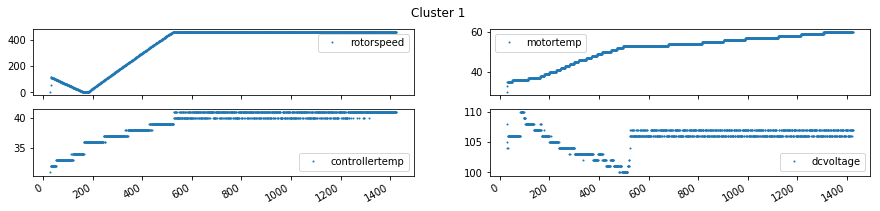

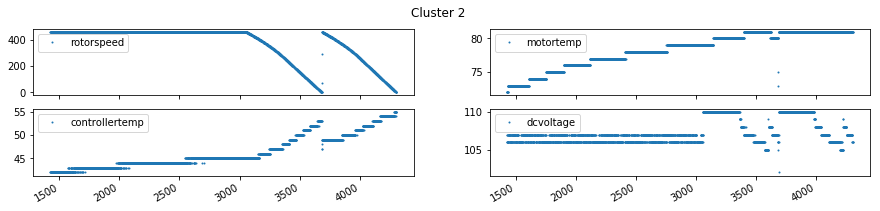

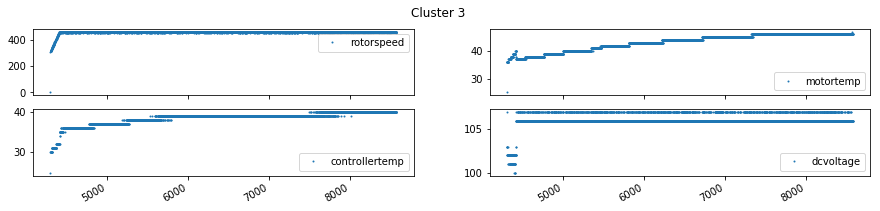

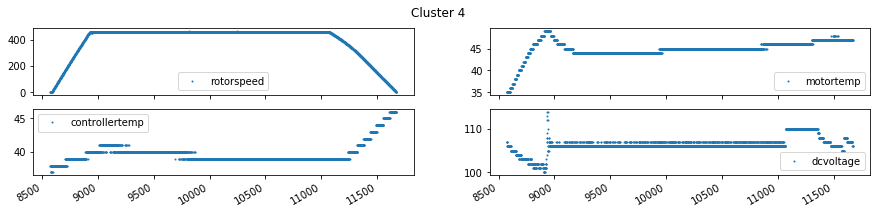

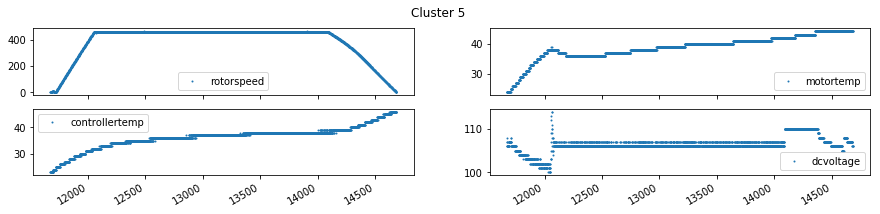

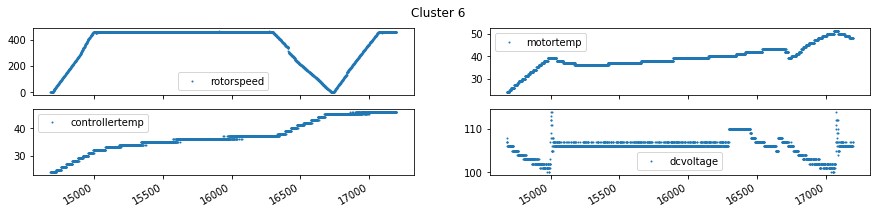

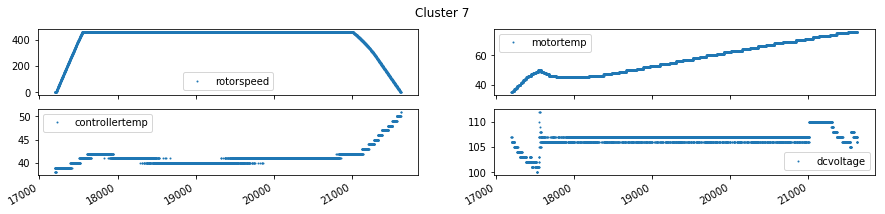

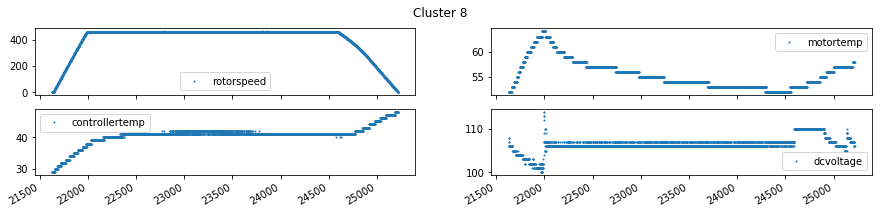

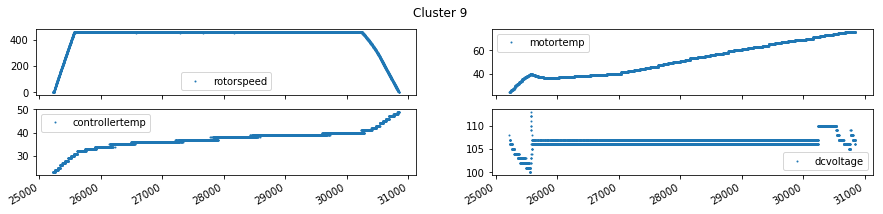

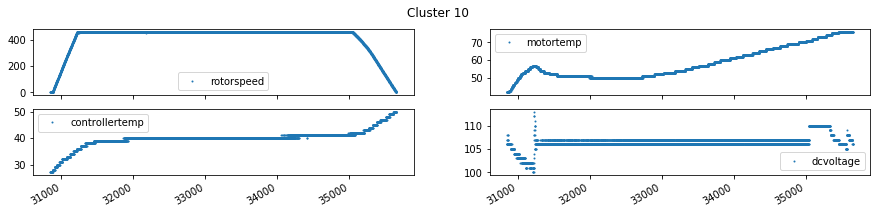

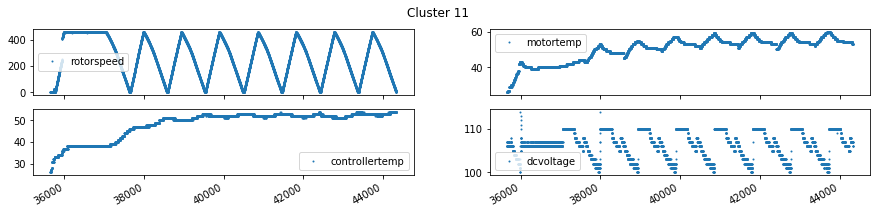

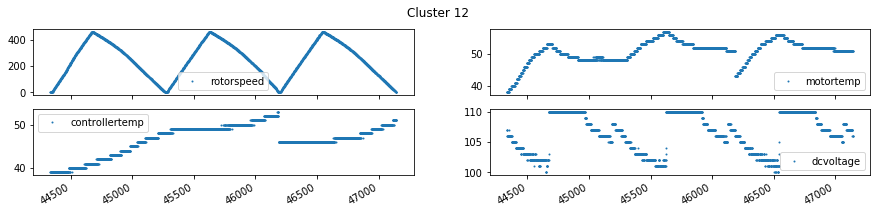

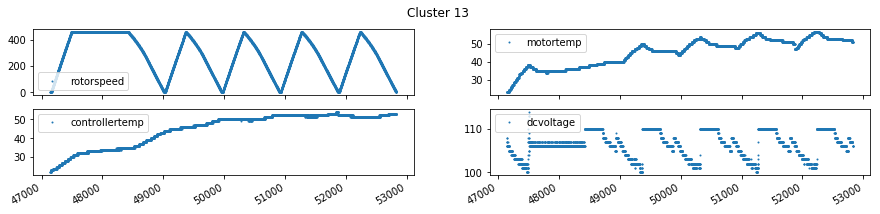

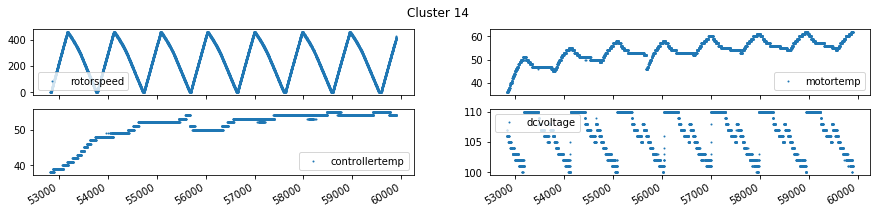

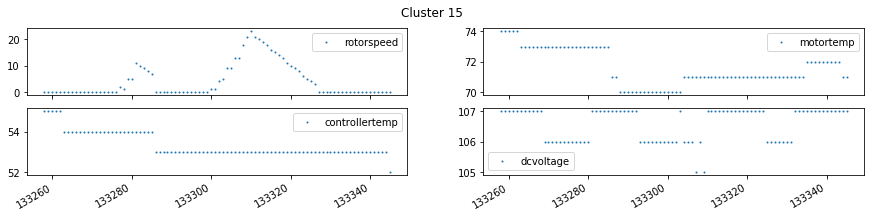

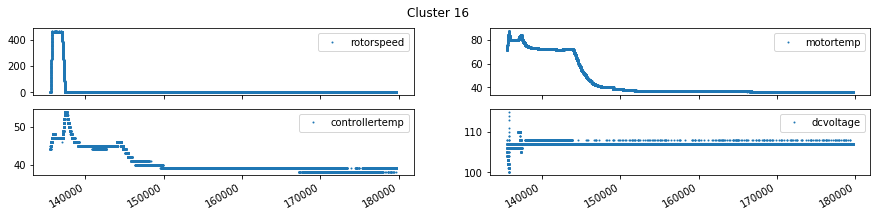

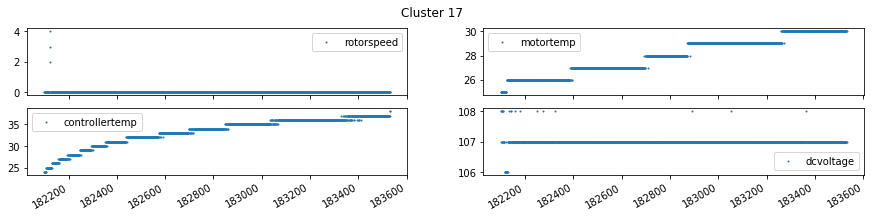

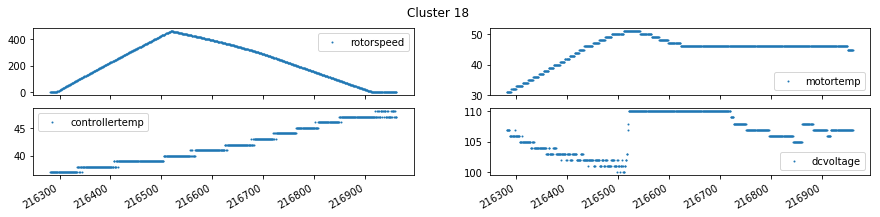

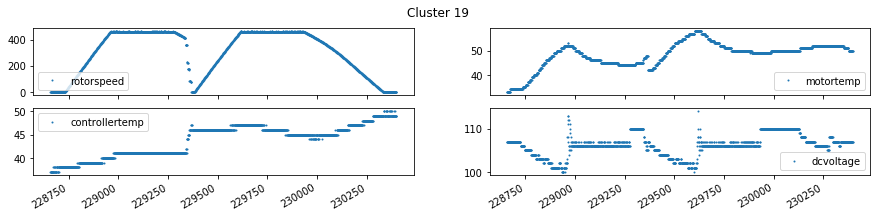

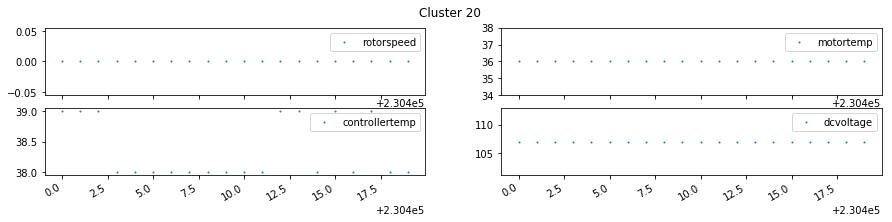

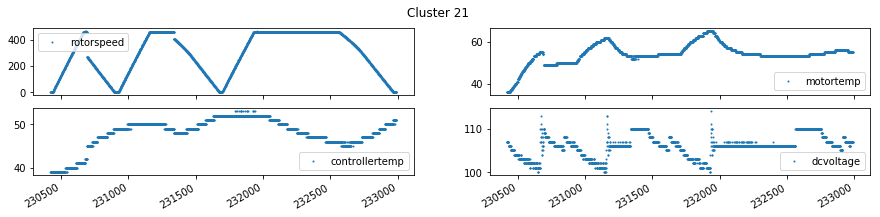

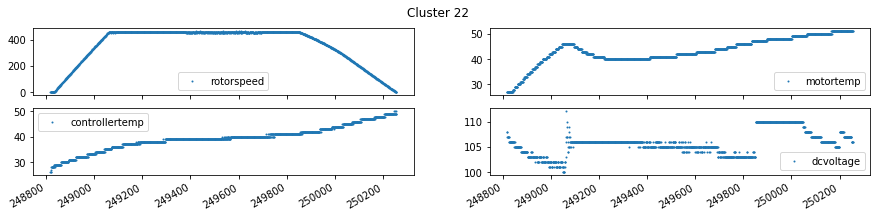

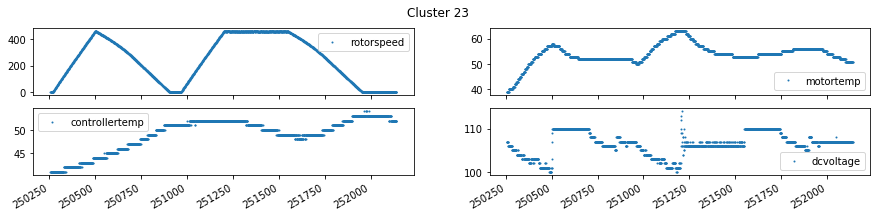

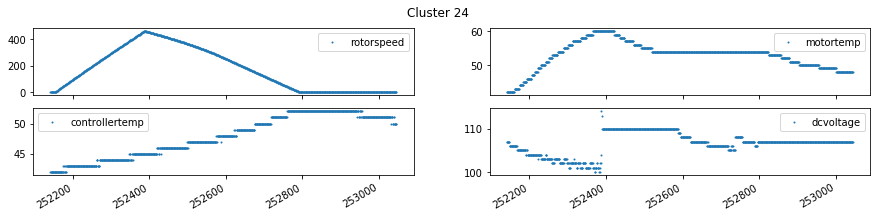

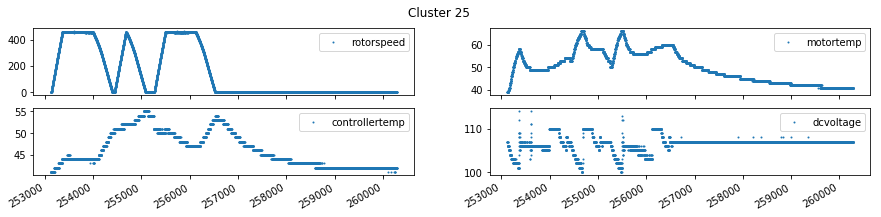

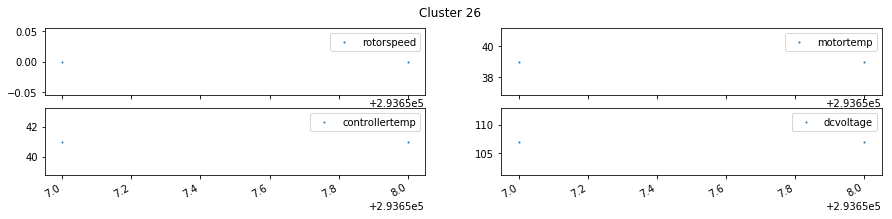

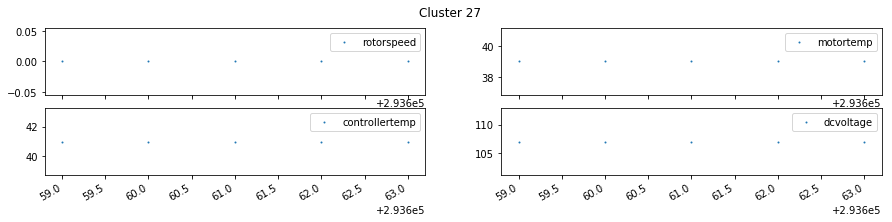

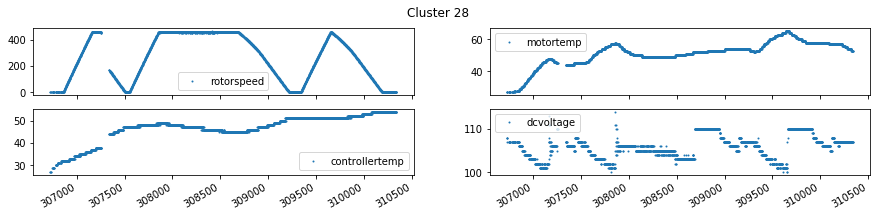

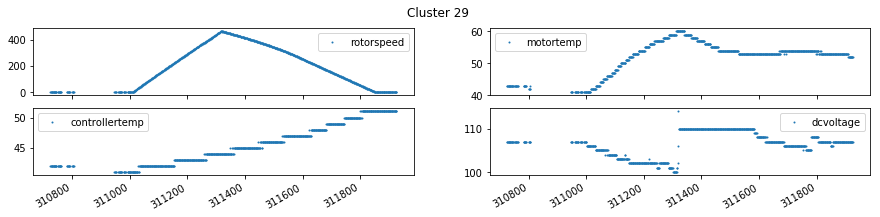

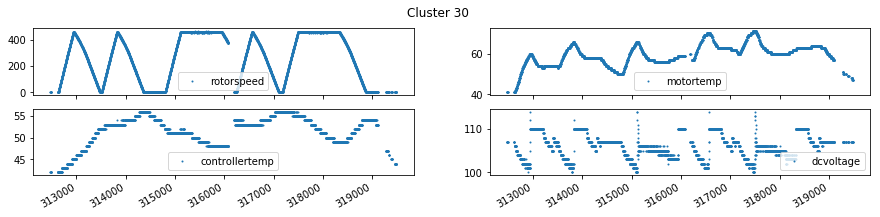

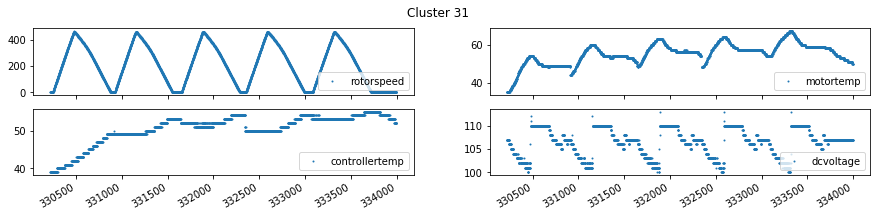

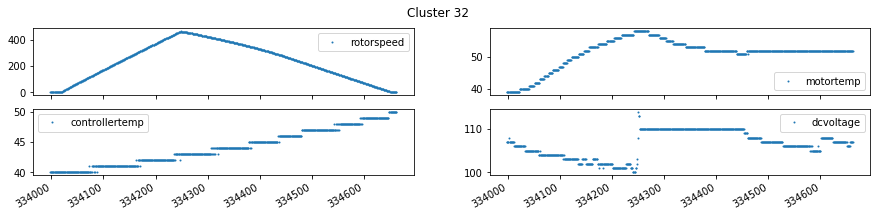

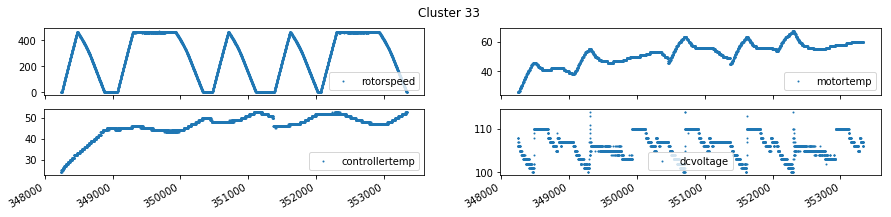

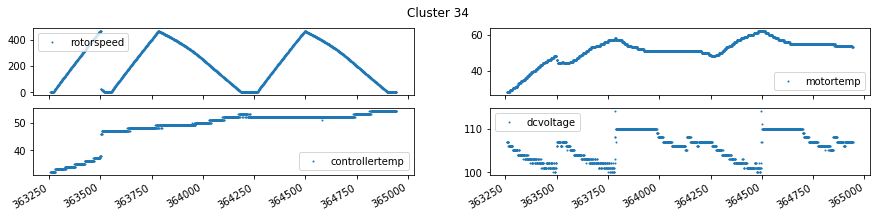

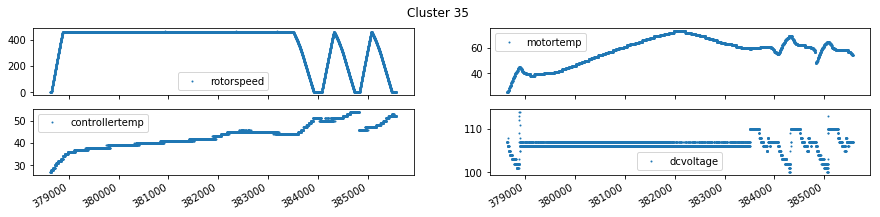

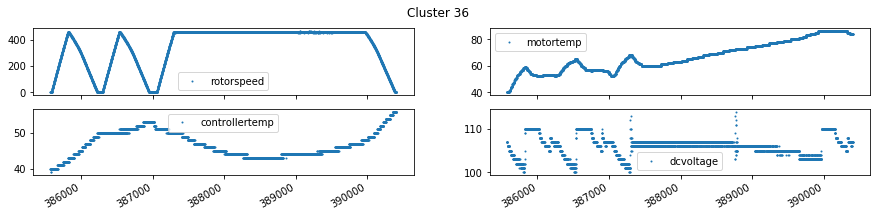

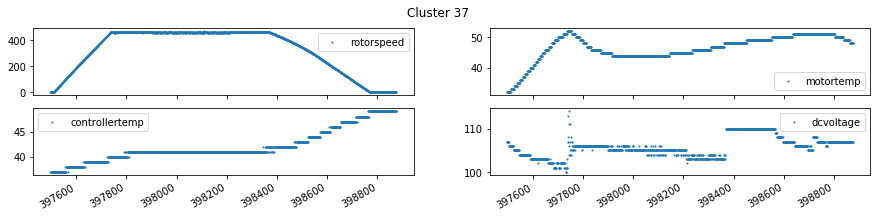

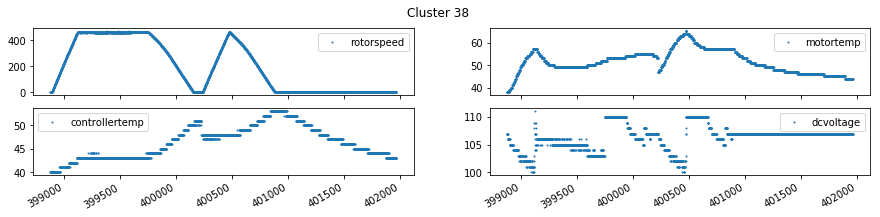

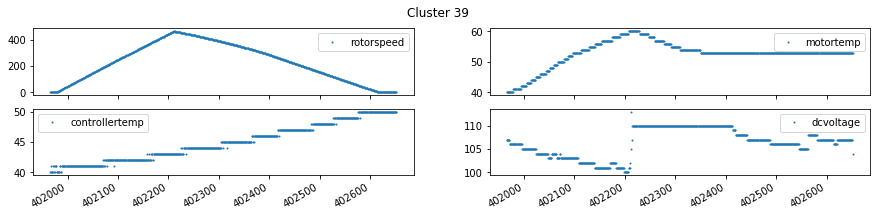

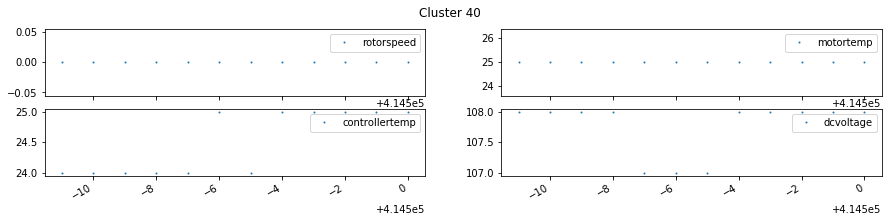

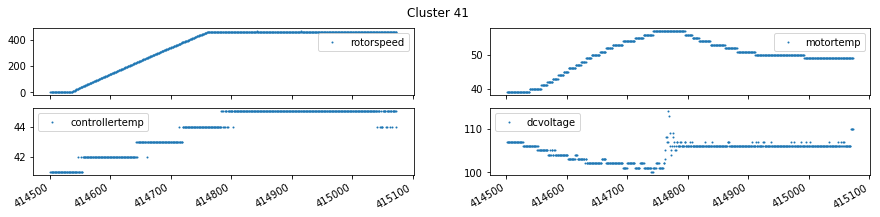

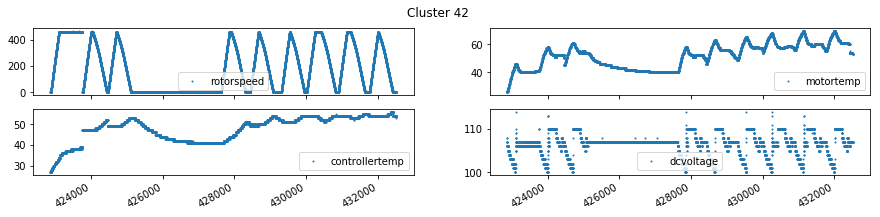

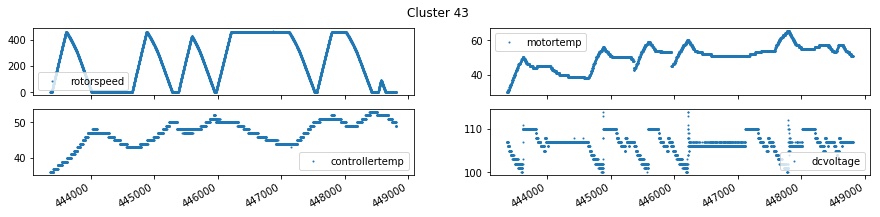

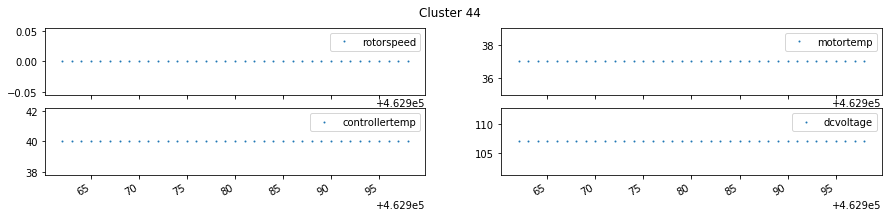

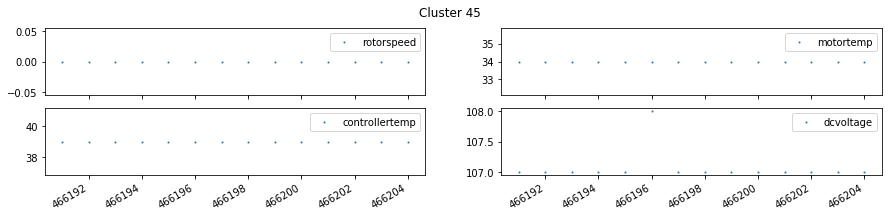

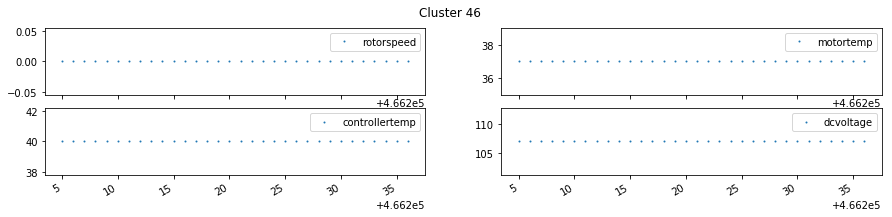

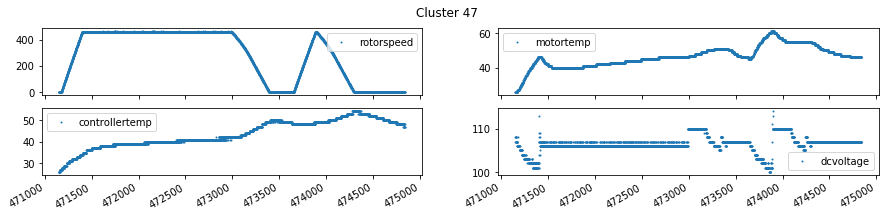

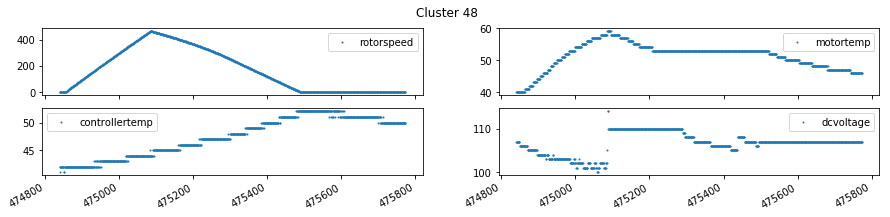

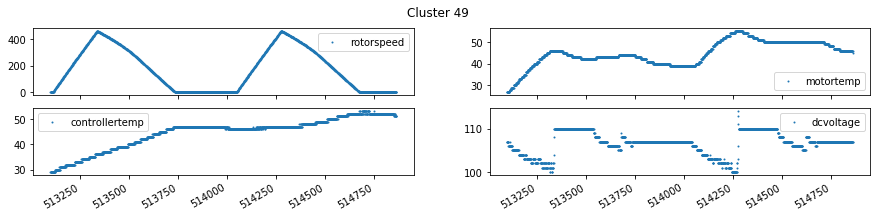

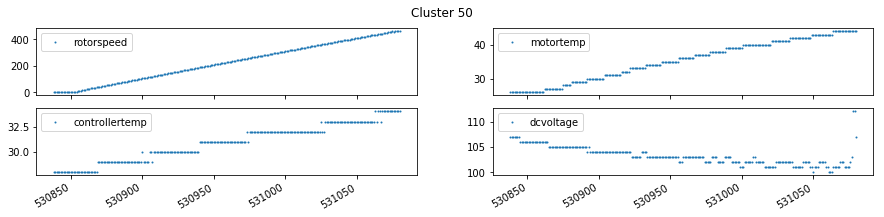

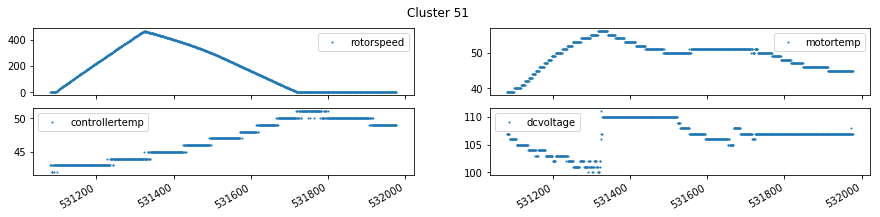

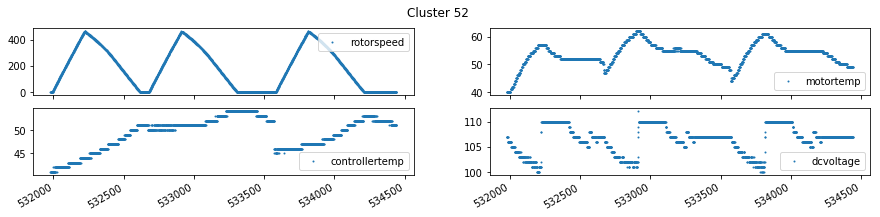

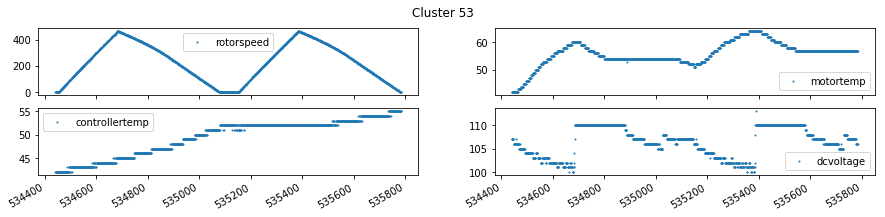

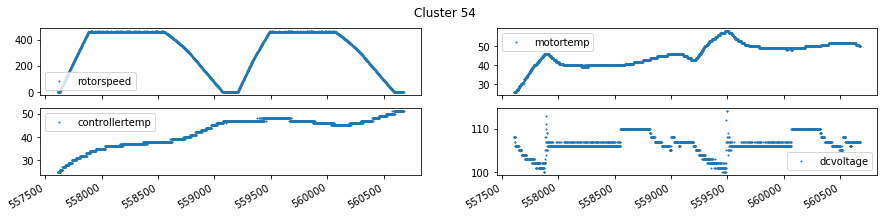

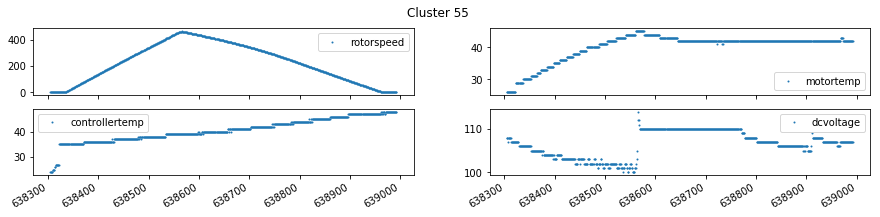

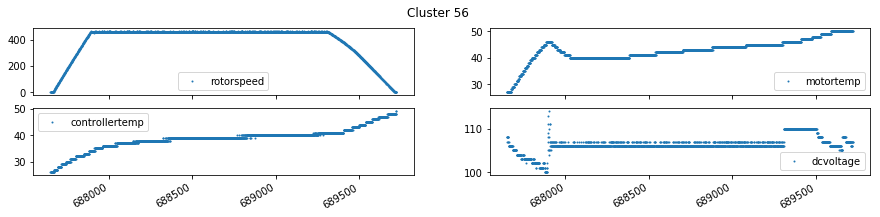

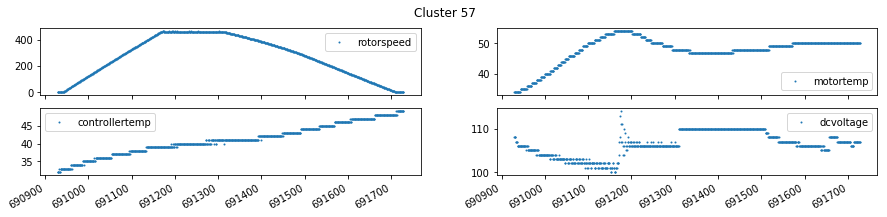

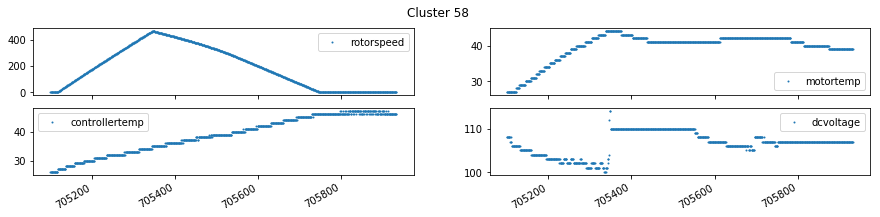

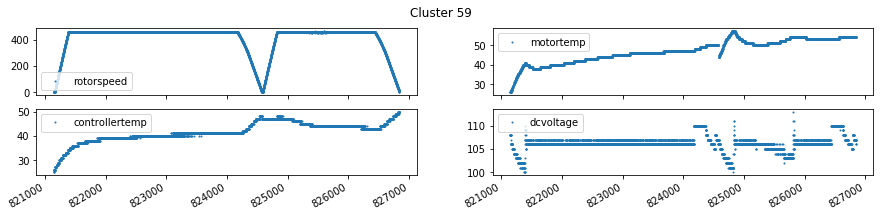

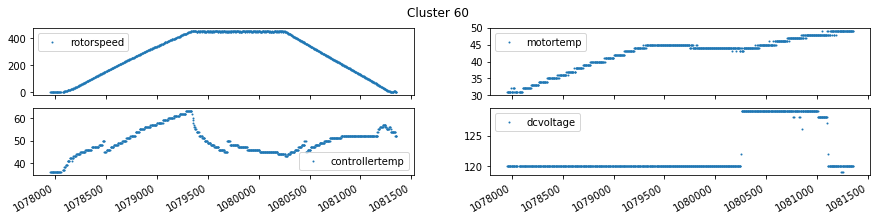

In [99]:
def get_clusters(unit_sequence_id):
    """
    Parameters:
        unit_sequence_id (int): the id of the pump (fx -18202).
        # col_name (str): the column to extract data for (fx "controllertemp")
    Returns:
        clusters (list(DataFrame)): the DataFrame clusters, ordered by time.
    """
    dfc = x[x["unitsequence"] == unit_sequence_id].sort_values("timestamp").copy()
    cluster = (dfc["timestamp"].diff() > pd.Timedelta(minutes=30)).cumsum()
    dfc = [v for k,v in dfc.groupby(cluster)]
    return dfc

def plot_cluster(cluster, title=None):
    cluster.plot(y=["rotorspeed", "motortemp", "controllertemp", "dcvoltage"],
                subplots=True, layout=(2,2), marker='o', linestyle='None', color=blue,
                markersize=1)
    if title:
        plt.suptitle(title)
    plt.show()
            
clusters = get_clusters(-18200)
print("All the clusters for unit_sequence -18200")
for i, cluster in enumerate(clusters):
    plot_cluster(cluster, title="Cluster {}".format(i+1))

In [3]:
x.head()

,unitsequence,uppervalue,lowervalue,rotorspeed,motortemp,controllertemp,dcvoltage,motorcurrent,rotorposition0,rotorposition1,...,temp1,temp2,heater1,heater2,tcpressure,timestamp,currentregen,alarmstatusbits,alertstatusbits,valvestate
0,-18202,9.6,7.4,454.0,59.0,35.0,139.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-14 08:29:00,NaN,NaN,NaN,NaN
1,-18202,0.1,0.5,20.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:00,NaN,NaN,NaN,NaN
2,-18202,0.1,0.5,19.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:00,NaN,NaN,NaN,NaN
3,-18202,0.2,0.5,18.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:00,NaN,NaN,NaN,NaN
4,-18202,0.1,0.5,17.0,34.0,38.0,106.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-12-22 08:23:00,NaN,NaN,NaN,NaN


## Theorizing that `unit_sequence` is the unique ID

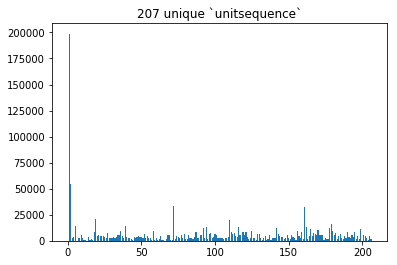

unitsequence ranges from -30997 to -9282
count ranges from 28 to 198742


In [4]:
unit_sequences = x["unitsequence"].unique()
count = np.array([
    x[x['unitsequence']==us].shape[0] for us in unit_sequences
])
n = len(count)
plt.bar(np.arange(n), count)
plt.title("{} unique `unitsequence`".format(n))
plt.show()
print("unitsequence ranges from {} to {}".format(unit_sequences.min(), 
                                                 unit_sequences.max()))
print("count ranges from {} to {}".format(count.min(), count.max()))

## All the Sparse Data

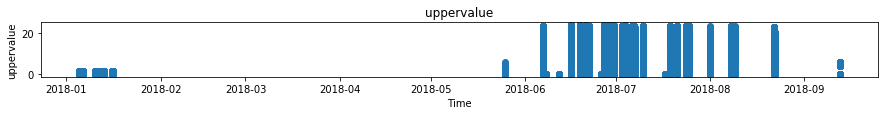

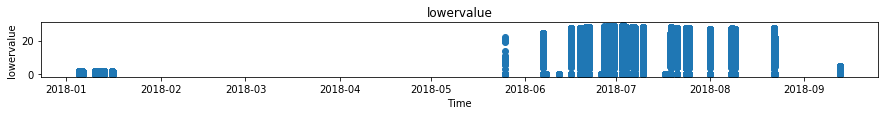

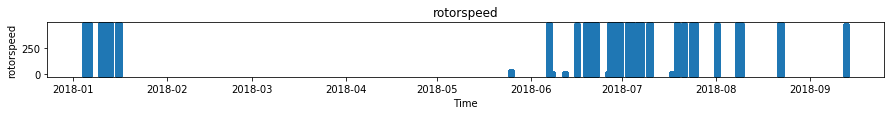

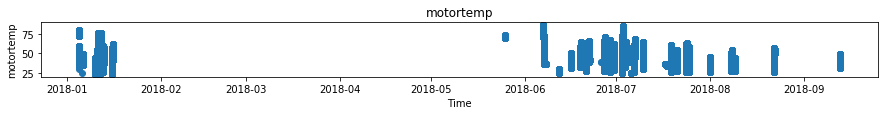

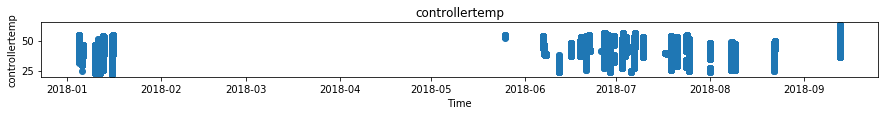

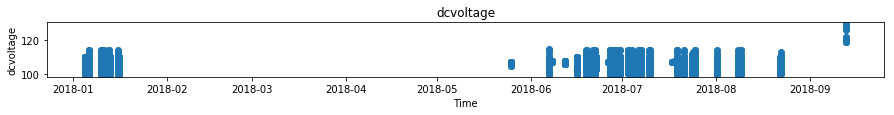

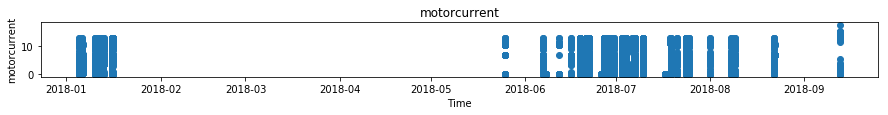

In [6]:
def plot_over_time(t,y,desc):
    fig = plt.figure(figsize=(15,1))
    ax = fig.add_subplot(111)
    ax.plot(t, y, 'o')
    ax.set_xlabel("Time")
    ax.set_ylabel(desc)
    ax.set_title(desc)
    plt.show()

n_timesteps, n_cols = df.shape
t = df["timestamp"].values
cols = ["uppervalue", "lowervalue", "rotorspeed","motortemp","controllertemp","dcvoltage","motorcurrent"]
for col in cols:
    plot_over_time(t,df[col].values,col)

dfs: (1820, 39)


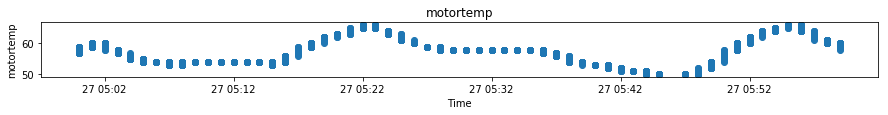

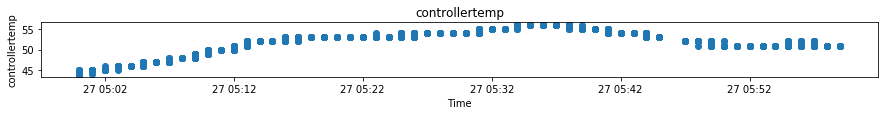

In [24]:
def print_not_null_counts():
    all_cols = list(x.columns.values)
    counts = {}
    for col in all_cols:
        counts[col] = x[x[col].notnull()].shape[0]
    for col, val in sorted(counts.items()):
        print(col, counts[col])

def time_slice():
    dt1 = '2018-06-27 05:00:00'
    dt2 = '2018-06-27 06:00:00'
    dfs = df[(dt1 <= df['timestamp']) & (df['timestamp'] < dt2)]
    print("dfs:", dfs.shape)